# installation of required libraries

In [3]:
!pip install keras
!pip install tensorflow

In [4]:
import pandas as pd
from scikitplot.metrics import plot_confusion_matrix as plt_con_mat
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, Dense, Dropout, MaxPooling2D, Flatten
from keras.utils import plot_model
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [5]:
dir = 'C:\\Users\\Saipriya'
categories = ['cataract_aug','normal_aug']

# Data Augmentation

In [ ]:
# Define the path to the folder containing the original images
original_path = "C:\\Users\\Saipriya\\normal"

# Define the path to the folder where the augmented images will be saved
augmented_path = "C:\\Users\\Saipriya\\normal_aug\\"

# Define the list of augmentation techniques to use
augmentations = ['flip_horizontal', 'flip_vertical', 'rotate', 'scale', 'crop', 'translate']

# Loop over all the original images in the folder
for file in os.listdir(original_path):
    img = cv2.imread(os.path.join(original_path, file))
    for aug in augmentations:
        if aug == 'flip_horizontal':
            img_aug = cv2.flip(img, 1)
            cv2.imwrite(augmented_path + file.split('.')[0] + '_flip_horizontal.jpg', img_aug)
            
        elif aug == 'flip_vertical':
            img_aug = cv2.flip(img, 0)
            cv2.imwrite(augmented_path + file.split('.')[0] + '_flip_vertical.jpg', img_aug)

        elif aug == 'rotate':
            rows, cols, _ = img.shape
            M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
            img_aug = cv2.warpAffine(img, M, (cols, rows))
            cv2.imwrite(augmented_path + file.split('.')[0] + '_rotate.jpg', img_aug)

        elif aug == 'scale':
            img_aug = cv2.resize(img, None, fx=0.5, fy=0.5, interpolation=cv2.INTER_LINEAR)
            cv2.imwrite(augmented_path + file.split('.')[0] + '_scale.jpg', img_aug)

        elif aug == 'crop':
            rows, cols, _ = img.shape
            x1 = int(cols/4)
            x2 = int(cols/4 * 3)
            y1 = int(rows/4)
            y2 = int(rows/4 * 3)
            img_aug = img[y1:y2, x1:x2]
            cv2.imwrite(augmented_path + file.split('.')[0] + '_crop.jpg', img_aug)

        elif aug == 'translate':
            rows, cols, _ = img.shape
            M = np.float32([[1, 0, 100], [0, 1, 50]])
            img_aug = cv2.warpAffine(img, M, (cols, rows))
            cv2.imwrite(augmented_path + file.split('.')[0] + '_translate.jpg', img_aug)

# VGG19

In [6]:
data=[]
labels = []
for category in categories:
    label = categories.index(category)
    path = os.path.join(dir,category)
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        cat_img = cv2.imread(imgpath)
        #print(np.shape(cat_img))
        try:
            cat_img = cv2.resize(cat_img,(224,224))
            #image = np.array(cat_img).flatten()
        except Exception as e:
            continue
        data.append(cat_img)
        labels.append(label)

In [7]:
print(np.size(labels))
print(np.shape(data))

2800
(2800, 224, 224, 3)


In [8]:
x_data = np.array(data)
y_data = np.array(labels)
y_data = np.expand_dims(y_data, axis = -1)
y_data = to_categorical(y_data)


In [23]:
y_data[0]

array([1., 0.], dtype=float32)

In [9]:
ROW = 224
COL = 224

In [10]:
vgg = VGG19(weights = "imagenet", include_top = False, input_shape=(ROW, COL, 3))
for layer in vgg.layers:
    layer.trainable = False

In [11]:
model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(2,activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 64)                1605696   
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 21,630,210
Trainable params: 1,605,826
Non-trainable params: 20,024,384
_________________________________________________________________


In [12]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, shuffle = True, random_state = 1)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2240, 224, 224, 3) (2240, 2)
(560, 224, 224, 3) (560, 2)


In [13]:
model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics=['accuracy', 'Precision', 'Recall'])

history = model.fit(X_train, y_train, 
                    validation_data = (X_test, y_test), 
                    epochs = 15,
                    batch_size = 25)

Epoch 1/15
90/90 [==============================] - 729s 8s/step - loss: 1.7504 - accuracy: 0.8469 - precision: 0.8469 - recall: 0.8469 - val_loss: 0.3005 - val_accuracy: 0.8643 - val_precision: 0.8643 - val_recall: 0.8643
Epoch 2/15
90/90 [==============================] - 695s 8s/step - loss: 0.2165 - accuracy: 0.9103 - precision: 0.9103 - recall: 0.9103 - val_loss: 0.3160 - val_accuracy: 0.9018 - val_precision: 0.9018 - val_recall: 0.9018
Epoch 3/15
90/90 [==============================] - 692s 8s/step - loss: 0.1764 - accuracy: 0.9281 - precision: 0.9281 - recall: 0.9281 - val_loss: 0.2513 - val_accuracy: 0.9250 - val_precision: 0.9250 - val_recall: 0.9250
Epoch 4/15
90/90 [==============================] - 709s 8s/step - loss: 0.1434 - accuracy: 0.9366 - precision: 0.9366 - recall: 0.9366 - val_loss: 0.2268 - val_accuracy: 0.9214 - val_precision: 0.9214 - val_recall: 0.9214
Epoch 5/15
90/90 [==============================] - 689s 8s/step - loss: 0.1130 - accuracy: 0.9571 - precisi

C:\Users\Saipriya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saipriya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saipriya\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Saip

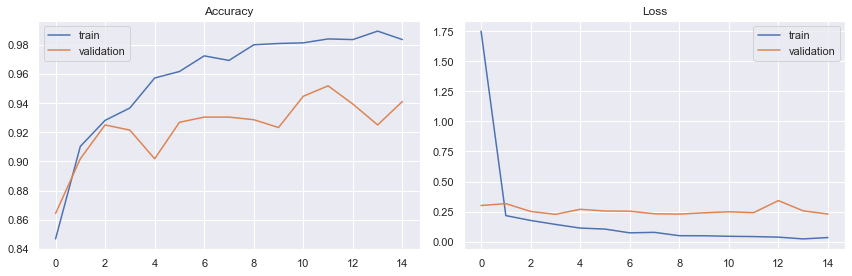

In [14]:
import seaborn as sns
sns.set()
fig = plt.figure(0, (12, 4))

ax = plt.subplot(1, 2, 1)
sns.lineplot(history.epoch, history.history['accuracy'], label = 'train')
sns.lineplot(history.epoch, history.history['val_accuracy'], label = 'validation')
plt.title('Accuracy')
plt.tight_layout()

ax = plt.subplot(1, 2, 2)
sns.lineplot(history.epoch, history.history['loss'], label = 'train')
sns.lineplot(history.epoch, history.history['val_loss'], label = 'validation')
plt.title('Loss')
plt.tight_layout()

#plt.savefig('epoch_history.png')
plt.show()

In [15]:
preds = (model.predict(X_test) > 0.5).astype("int32")
y_true = np.argmax(y_test, axis=1)

18/18 [==============================] - 77s 4s/step


In [16]:
preds_=[]
for i in preds:
    preds_.append(np.argmax(i))

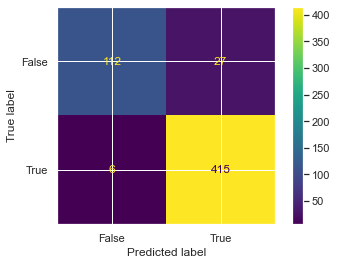

In [17]:
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_true, preds_)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [18]:
from sklearn.metrics import accuracy_score,classification_report

In [19]:
acc = accuracy_score(preds_,y_true)
print(acc)
print(classification_report(preds_,y_true))


0.9410714285714286
              precision    recall  f1-score   support

           0       0.81      0.95      0.87       118
           1       0.99      0.94      0.96       442

    accuracy                           0.94       560
   macro avg       0.90      0.94      0.92       560
weighted avg       0.95      0.94      0.94       560

